### 102 Binary tree order traversing

In [2]:
#or from pythonds.basic.deque import Deque

In [4]:
class Solution:
    def levelOrder(self, root: TreeNode) -> List[List[int]]:
        if not root:return[]
        queue = collections.deque()
        queue.append(root)
        res=[]
        while queue:
            level = []
            for i in range(len(queue)):
                node = queue.popleft()
                level.append(node.val)
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
            
            res.append(level)
        return res
#Runtime: 44 ms, faster than 77.26% of Python3#

### 103 Binary Tree  zigzag traversing

In [ ]:
#rivising from 102, change the ouput methods each other 2 points
class Solution:
    def zigzagLevelOrder(self, root: TreeNode) -> List[List[int]]:
        if not root:return[]
        queue = collections.deque()
        queue.append(root)
        res=[]
        while queue:
            level = []
            size=len(queue)
            for i in range(size):
                node = queue.popleft()             
                level.append(node.val)
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
            res.append(level)
        for i in range(1, len(res), 2):
            res[i] = res[i][::-1]  
        return res
#40 ms, faster than 82.10% of Python3

### 310 Minimum Height Trees

In [ ]:
#BFS的思想：不是从根节点开始BFS,而是从叶子节点开始一层一层剪枝
#最后一个或两个节点即为MHTs的root,
#so, 一个树性质的无向图，最多有2个MHTs
#time:O(nlog(n)), space:O(n)

In [ ]:
def findMinHeightTrees(n,edges):
    if n==1:return[0]
    
    #initialize adjacency list
    adj=[set() for _ in range(n)]
    for i,j in edges:
        adj[i].add(j)
        adj[j].add(i)
        
    #create a list of leaves
    leaves=[i for i in range(n) if len(adj[i])==1]
    if len(leaves)<1:return(0)
    
    #BFS leaves
    while n>2:
        n = n - len(leaves)
        newleaves=[]
        for i in leaves:
            j=adj[i].pop()  #pop leaves level by level
            adj[j].remove(i) #delete edges level by level
            
            #stop criterion
            if len(adj[j])==1:
                newleaves.append(j)
        leaves=newleaves
        
    return leaves

##Runtime: 100 ms, faster than 59.03% of Python3##

### 541 Matrix with 0&1

In [ ]:
#找到0最近的距离 for each cell
#If BFS, using queue
#all 0 存入queue，留作遍历, initial distance for all 1 is infinite
#遍历每个点的四个方向，every new cell，当前距0的距离+1，作为该点距离0的distance

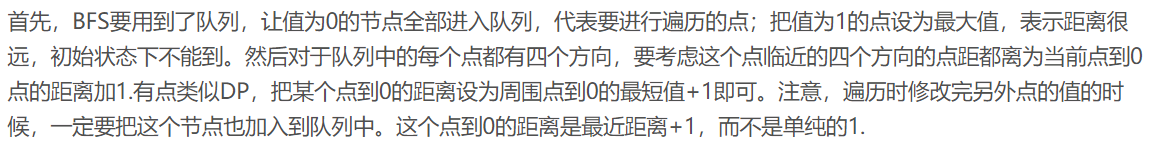

In [1]:
from IPython.display import Image   
Image(filename='BFS1.png')

In [ ]:
def updateMatrix(matrix):
    r=numpy.shape(matrix)[0]
    c=numpy.shape(matrix)[1]
    if r<=0 or c<=0: return matrix
    queue = collections.deque() 

    #initialize the queue and the distance of 1
    for i in range(r):
        for j in range(c):
            if matrix[i][j]==1:
                matrix[i][j]=float('Inf')
            else:
                queue.append((i,j))

    #BFS deque from 4 directions
    while queue:
        (x,y) = queue.popleft()
        for i,j in [(x-1,y),(x,y-1),(x+1,y),(x,y+1)]:
            if 0<= i < r and 0 <= j < c and matrix[i][j]==float('Inf'): #when encounter 1
                matrix[i][j]=matrix[x][y]+1  #update the distance:current dis + 1
                queue.append((i,j))  #put it in queue

    return matrix

  ##592 ms, faster than 44.66% of Python3 ##   

### 127 Word Ladder

In [ ]:
#The shortest distance, BFS from beginword to endword using queue
#to save time, using dictionary store the word partten
#using hashset to store words searched
#My problem: 如何实现queue和dictionary/set-->多练习多使用

In [ ]:
def ladderLength(beginWord, endWord, wordList):
        if beginWord == None or endWord == None or len(beginWord)!=len(endWord) or len(wordList)  == 0 or endWord == beginWord or endWord not in wordList:
            return 0
        
        #build a dictionary storing the word pattern
        word_dict=collections.defaultdict(list)
        for word in wordList:
            for i in range(len(word)):
                pattern=word[:i]+'_'+word[i+1:]
                word_dict[pattern].append(word)
        
        #print(word_dict)

        #build queue (word,level)
        queue = collections.deque([(beginWord,1)])
        visited = set()
        
        #BFS
        while queue:
            word,level=queue.popleft()
            if word==endWord:
                return level
            if word not in visited:
                visited.add(word)
                for i in range(len(word)):
                    partten=word[:i]+'_'+word[i+1:]
                    nwords = word_dict.get(pattern,[])
                    for nword in nwords:
                        if nword not in visited:
                            queue.append((nword,level+1))
                            
        return 0
    
#124 ms, faster than 76%

In [ ]:
def ladderLength(beginWord, endWord, wordList):
        if beginWord == None or endWord == None or len(beginWord)!=len(endWord) or len(wordList)  == 0 or endWord == beginWord or endWord not in wordList:
            return 0
        #build a dict. to store all the pattern of wordlist
        pattern = collections.defaultdict(list)
        L = len(beginWord)
        for word in wordList:
            for i in range(L):
                pattern[word[:i]+'_'+word[i+1:]].append(word)

        #build a queue to store the current word
        #build a set to store visited word
        queue = collections.deque([beginWord])
        visited = set(beginWord)
        level = 1
        
        #BFS
        while queue:
            size = len(queue)
            level += 1
            for _ in  range(size):
                cur = queue.popleft()
                for i in range(L):
                    for word in pattern[cur[:i]+'.'+cur[i+1:]]:
                        if word == endWord:
                            return level
                        elif word not in visited:
                            queue.append(word)
                            visited.add(word)
        return 0
    #108 ms, faster than 90.63%

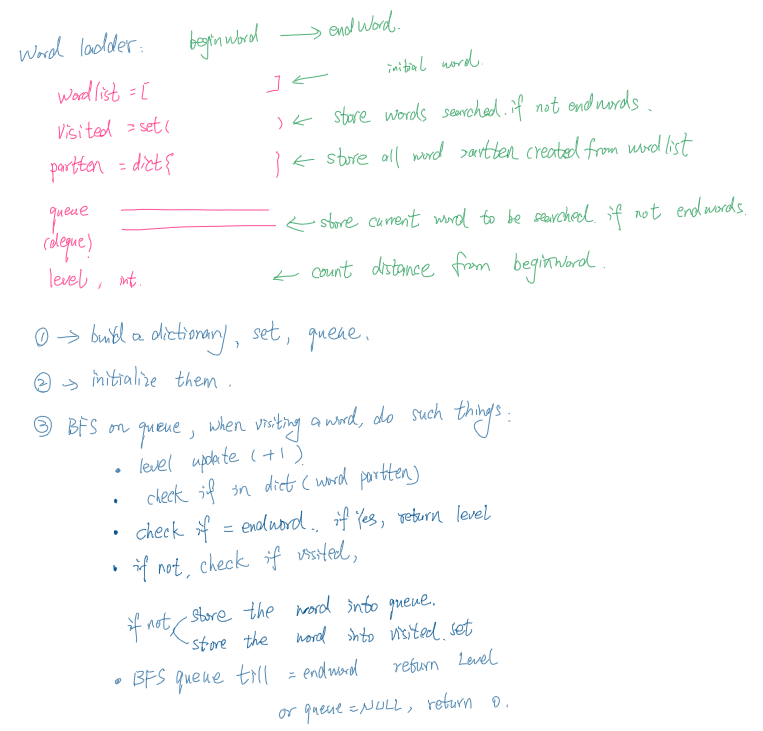

In [2]:
#summary
from IPython.display import Image   
Image(filename='wordladder.png')

### 934 shortest bridge

In [ ]:
#use DFS find one of the island, set all 1 on the island into 2, (to differ it from another island), store all visited cell into queue
#use BFS find the shortest bridge, each step,if find 1, then found, if not, set the visited cell into 2, store them into queue 

In [ ]:
class Solution:
    def shortestBridge(self, A: List[List[int]]) -> int:
        queue = collections.deque()
        nr,nc=len(A),len(A[0])
    
        for i in range(nr):
            for j in range(nc):
                if A[i][j]==1:
                    self.dfs(A,i,j,queue)  #using queue to store all 1 (changed to 2) on the island
                    break
            if len(queue)>0:break
        
        step=0
        
        #BFS on the queue untill find 1
        while queue:
            size=len(queue)
            for k in range(size):
                pos=queue.popleft()
                i,j = pos[0], pos[1]
                if A[i][j]==1: return step-1
                
                self.add(queue,A,i+1,j)
                self.add(queue,A,i-1,j)
                self.add(queue,A,i,j+1)
                self.add(queue,A,i,j-1)
            step =step+1
        return -1
    
    def dfs(self, a, i, j, queue):  #dfs finds one of the island, store all the 1 (set them into 2) in a queue
        if i<0 or i >= len(a) or j<0 or j>=len(a[0]): return
        if a[i][j] != 1: return
        
        a[i][j] = 2
        queue.append((i,j))
        self.dfs(a, i+1, j, queue)
        self.dfs(a, i-1, j, queue)
        self.dfs(a, i, j+1, queue)
        self.dfs(a, i, j-1, queue)
        
    def add(self, queue, a, i, j):  #add function adds all visited points which is 0 (changed to 2) in the queue
        if i<0 or i>=len(a) or j<0 or j>=len(a[0]):return
        if a[i][j]==0 or a[i][j]==1:
            if a[i][j]==0:
                a[i][j]=2
            queue.append((i,j))
            
#232, 48.22%

In [ ]:
#summary: use DFS initilize the queue, then BFS